In [210]:
import pandas as pd
import numpy as np

In [211]:
df = pd.read_csv('train.csv')

In [212]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#Удаляем столбцы  PoolQC. Fence. MiscFeature. MasVnrType. Alley. Недостаток данных, столбцы заполены менеее чем на 50%.
#Так-же принято рещение удалить столбец FireplaceQu. столбец заполнен чуть более чем на 50%. в датасете уже имеется столбец Fireplace




In [214]:
df = df.drop(columns=['PoolQC', 'Fence', 'MiscFeature', 'MasVnrType', 'Alley', 'FireplaceQu'])

Неинформативные признаки
Если признак имеет слишком много строк с одинаковыми значениями, он не несет полезной информации для проекта.

In [246]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Street: 99.58904%
Street
Pave    1454
Grvl       6
Name: count, dtype: int64

Utilities: 99.93151%
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

Condition2: 98.97260%
Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

RoofMatl: 98.21918%
RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

Heating: 97.80822%
Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

LowQualFinSF: 98.21918%
LowQualFinSF
0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: c

In [247]:
df = df.drop(columns=['MiscVal', 'PoolArea', 'Utilities', 'Street'])

In [215]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 75, dtype: int64

#Проверяем нормальность распределения столбца LotFrontage. Для выбора метода интерполяции

In [216]:
df.describe().round()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1460.0,1201.0,1460.0,1460.0,1460.0,1460.0,1460.0,1452.0,1460.0,...,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,730.0,57.0,70.0,10517.0,6.0,6.0,1971.0,1985.0,104.0,444.0,...,94.0,47.0,22.0,3.0,15.0,3.0,43.0,6.0,2008.0,180921.0
std,422.0,42.0,24.0,9981.0,1.0,1.0,30.0,21.0,181.0,456.0,...,125.0,66.0,61.0,29.0,56.0,40.0,496.0,3.0,1.0,79443.0
min,1.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0
25%,366.0,20.0,59.0,7554.0,5.0,5.0,1954.0,1967.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0
50%,730.0,50.0,69.0,9478.0,6.0,5.0,1973.0,1994.0,0.0,384.0,...,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,163000.0
75%,1095.0,70.0,80.0,11602.0,7.0,6.0,2000.0,2004.0,166.0,712.0,...,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,214000.0
max,1460.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,...,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0,755000.0


Count — количество значений.
Mean — среднее значение.
Std — стандартное отклонение значения.
Min — минимальное значение.
Max — максимальное значение.
25% — первый квартиль, означающий, что 25% значений в столбце ниже этого значения.
50% — медиана, означающая, что половина значений в столбце ниже этого значения.
75% — третий квартиль, означающий, что 75% значений в столбце ниже этого значения.

#std - 24
 данные распределены с смещением
используем метод замены пустых значений медианой

In [217]:
median_age = df['LotFrontage'].median()
df['LotFrontage'] = df['LotFrontage'].fillna(median_age)

In [218]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,69.0,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [219]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [220]:

duplicates = df.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

#Дубликатов не обнаружено

#one-hot encoding столбца SaleCondition

In [221]:
df = pd.get_dummies(df, columns=['SaleCondition'])

#преоброзование категориальных данных в числовой формат
#выполнение label encoding столбца 'SaleType'

In [222]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['SaleType'] = le.fit_transform(df['SaleType'].astype(str))

In [223]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SalePrice,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,2,2008,8,208500,False,False,False,False,True,False
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,5,2007,8,181500,False,False,False,False,True,False
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,9,2008,8,223500,False,False,False,False,True,False
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,2,2006,8,140000,True,False,False,False,False,False
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,12,2008,8,250000,False,False,False,False,True,False


#Выполнение z-score для столбца 'LotFrontage'

In [224]:
#z-score статистическая мера показывающая на сколько стандартных отклонений точка данных отличается от среднего значения
#более 3 выброс.
#Выполнение z-score для столбца 'LotFrontage'
from scipy import stats

z = np.abs(stats.zscore(df['LotFrontage']))

#Установка порогового значения z-score
threshold = 3

#выяление выбросов на основе z-score
ouutliers = df['LotFrontage'] [z > threshold]

In [225]:
df['LotFrontage'].mean()

69.86369863013698

#полуаем список выбросов

In [226]:
ouutliers

171     141.0
197     174.0
231     174.0
277     140.0
313     150.0
446     137.0
807     144.0
909     149.0
934     313.0
1107    168.0
1127    182.0
1173    138.0
1182    160.0
1211    152.0
1298    313.0
1337    153.0
Name: LotFrontage, dtype: float64

#Замена выбросов медианным значением
#перед выбором метода интерполяции нужно смотреть нормальность распределения

In [227]:
df.loc[z > threshold, 'LotFrontage'] = df['LotFrontage'].median()

In [228]:
df['LotFrontage'].mean()

68.71027397260274

std практически не изменилось было 69 стало 68 метод подходит

#так-же выполним учебное задание по столбцу SalePrice

a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.

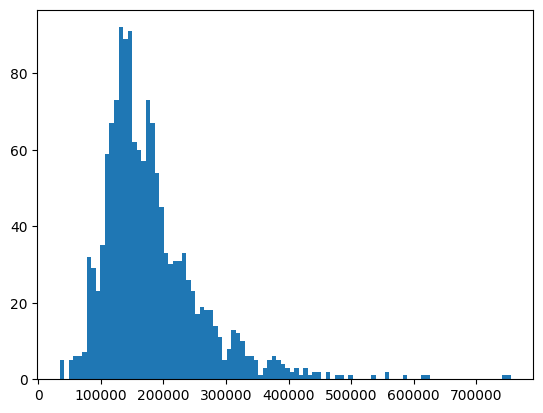

In [229]:
plt.hist(df['SalePrice'], bins = 100)
plt.show();

смещение графика куполовидной симетричной формы нет. распределение ненормальное. Имеются выбросы.

In [236]:

from scipy import stats

z = np.abs(stats.zscore(df['SalePrice']))

#Установка порогового значения z-score
threshold = 3

#выяление выбросов на основе z-score
ouutliers = df['SalePrice'] [z > threshold]

In [237]:
df['SalePrice'].mean()

180921.19589041095

In [238]:
ouutliers

58      438780
178     501837
185     475000
349     437154
389     426000
440     555000
473     440000
496     430000
527     446261
591     451950
664     423000
691     755000
769     538000
798     485000
803     582933
898     611657
1046    556581
1142    424870
1169    625000
1182    745000
1243    465000
1373    466500
Name: SalePrice, dtype: int64

In [251]:
from scipy import stats
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product

### Поскольку все переменные на нормальное распределение мы не проверяли, то лучше исользовать для оценки корреляции ранговый коэффициент Спирмена


In [252]:
variable = 'SalePrice'

# Выбор только количественных переменных
quantitative_vars = df.select_dtypes(include=['int64', 'float64'])

# Рассчет коэффициента корреляции Спирмена и p-value
results = {}
for col in quantitative_vars.columns:
    if col != variable:
        spearman_corr, p_value = spearmanr(df[variable], df[col])
        results[col] = {'Spearman_corr': spearman_corr, 'p_value': p_value}

results_df = pd.DataFrame.from_dict(results, orient='index')

print("Коэффициенты корреляции Спирмена и их р-значения с переменной ", variable, ":")
print(results_df)

Коэффициенты корреляции Спирмена и их р-значения с переменной  SalePrice :
               Spearman_corr        p_value
Id                 -0.017400   5.064780e-01
MSSubClass          0.011073   6.724876e-01
LotFrontage         0.358583   1.544325e-45
LotArea             0.430747   5.098105e-67
OverallQual         0.785053  1.406551e-305
OverallCond        -0.122885   2.486199e-06
YearBuilt           0.638208  8.054203e-168
YearRemodAdd        0.555182  8.095458e-119
MasVnrArea               NaN            NaN
BsmtFinSF1          0.279174   1.516345e-27
BsmtFinSF2         -0.034798   1.838786e-01
BsmtUnfSF           0.180475   3.727498e-12
TotalBsmtSF         0.575232  2.218780e-129
1stFlrSF            0.547528  5.672499e-115
2ndFlrSF            0.282289   3.757728e-28
LowQualFinSF       -0.074676   4.304913e-03
GrLivArea           0.706613  2.890874e-221
BsmtFullBath        0.212445   2.317947e-16
BsmtHalfBath       -0.011352   6.647233e-01
FullBath            0.619566  1.594830e-155
H

In [253]:
#### выбор переменных с коэффициентом корреляции Спирмена больше 0,7 (высокая корреляция) с p-значением меньше или равным 0,05 (значимые отличия от нуля)

significant_correlations = {col: values for col, values in results.items() if values['Spearman_corr'] > 0.7 and values['p_value'] <= 0.05}

significant_correlations_df = pd.DataFrame.from_dict(significant_correlations, orient='index')

print("Значимые высокие корреляции переменной SalePrice с переменными:")
print(significant_correlations_df)

Значимые высокие корреляции переменной SalePrice с переменными:
             Spearman_corr        p_value
OverallQual       0.785053  1.406551e-305
GrLivArea         0.706613  2.890874e-221


In [254]:
impotant_variables = ['OverallQual', 'GrLivArea', 'GarageCars']

In [255]:
df[impotant_variables].describe().round(2)

,OverallQual,GrLivArea,GarageCars
count,1460.00,1460.00,1460.00
mean,6.10,1515.46,1.77
std,1.38,525.48,0.75
min,1.00,334.00,0.00
25%,5.00,1129.50,1.00
50%,6.00,1464.00,2.00
75%,7.00,1776.75,2.00
max,10.00,5642.00,4.00


# Отрисовка гистограммы распределения важных переменных

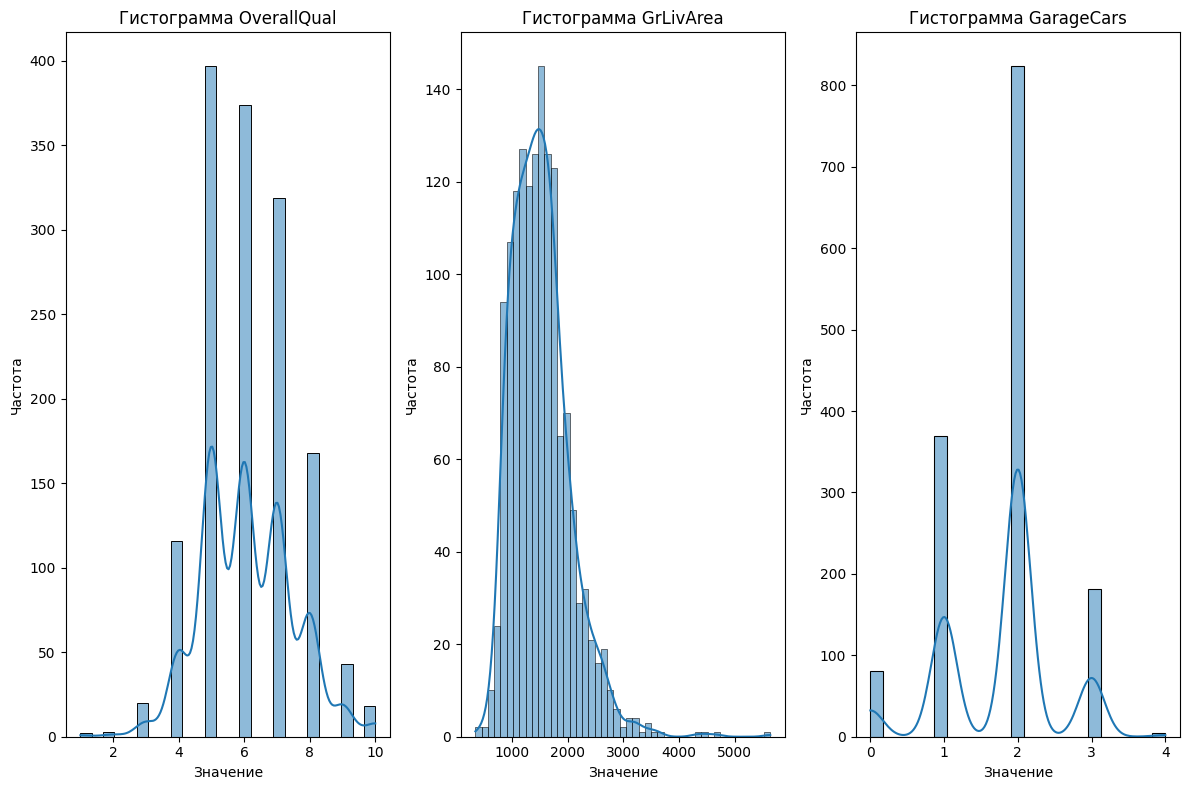

In [256]:

num_rows = 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

axes = axes.flatten()

for i, col in enumerate(impotant_variables):
    sns.histplot(data=df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Гистограмма {col}')
    axes[i].set_xlabel('Значение')
    axes[i].set_ylabel('Частота')

plt.tight_layout()
plt.show()



#### Вывод: переменные 'OverallQual' и 'GarageCars' имеют мультимодальное распределение, а переменная 'GrLivArea' лог-нормальное.

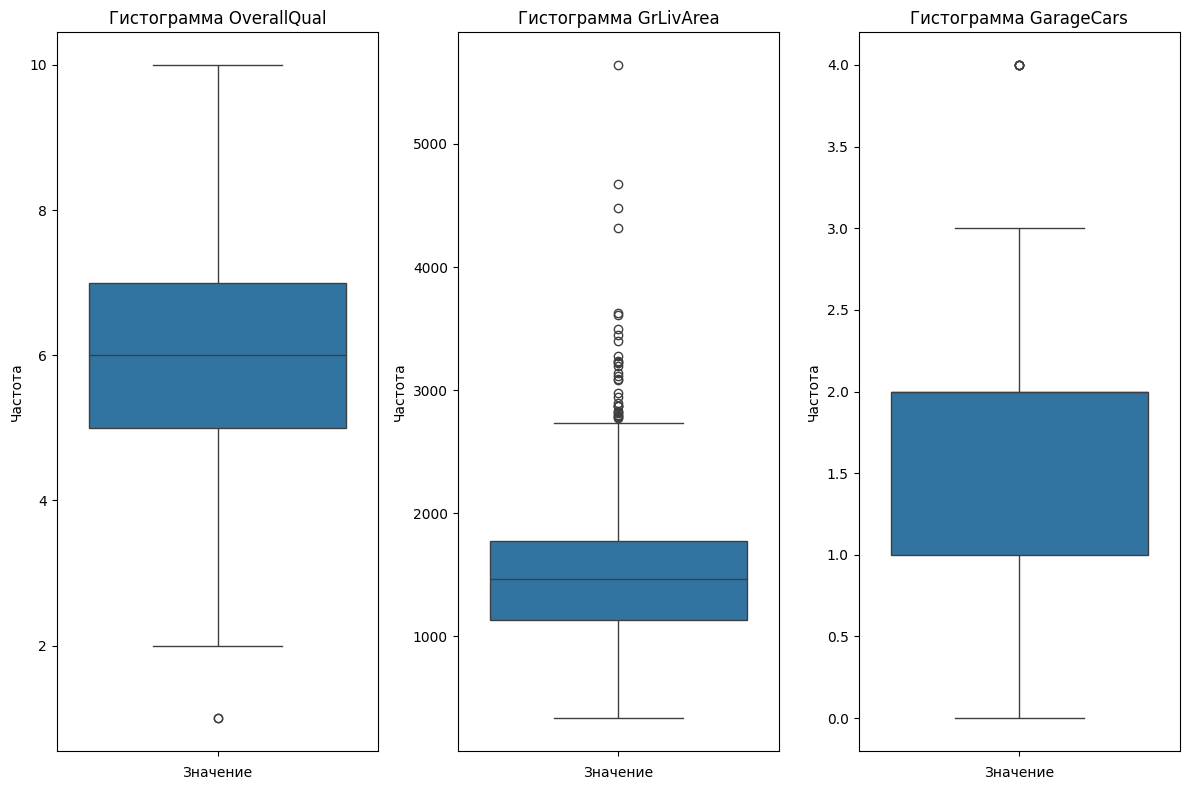

In [257]:

num_rows = 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

axes = axes.flatten()

for i, col in enumerate(impotant_variables):
    sns.boxplot(data=df, y = col, ax=axes[i])
    axes[i].set_title(f'Гистограмма {col}')
    axes[i].set_xlabel('Значение')
    axes[i].set_ylabel('Частота')

plt.tight_layout()
plt.show()

#### Вывод: переменныя 'OverallQual' не имеет выбросов, переменная 'GarageCars' имеет один выброс, а переменная 'GrLivArea' содержит множество выбросов.

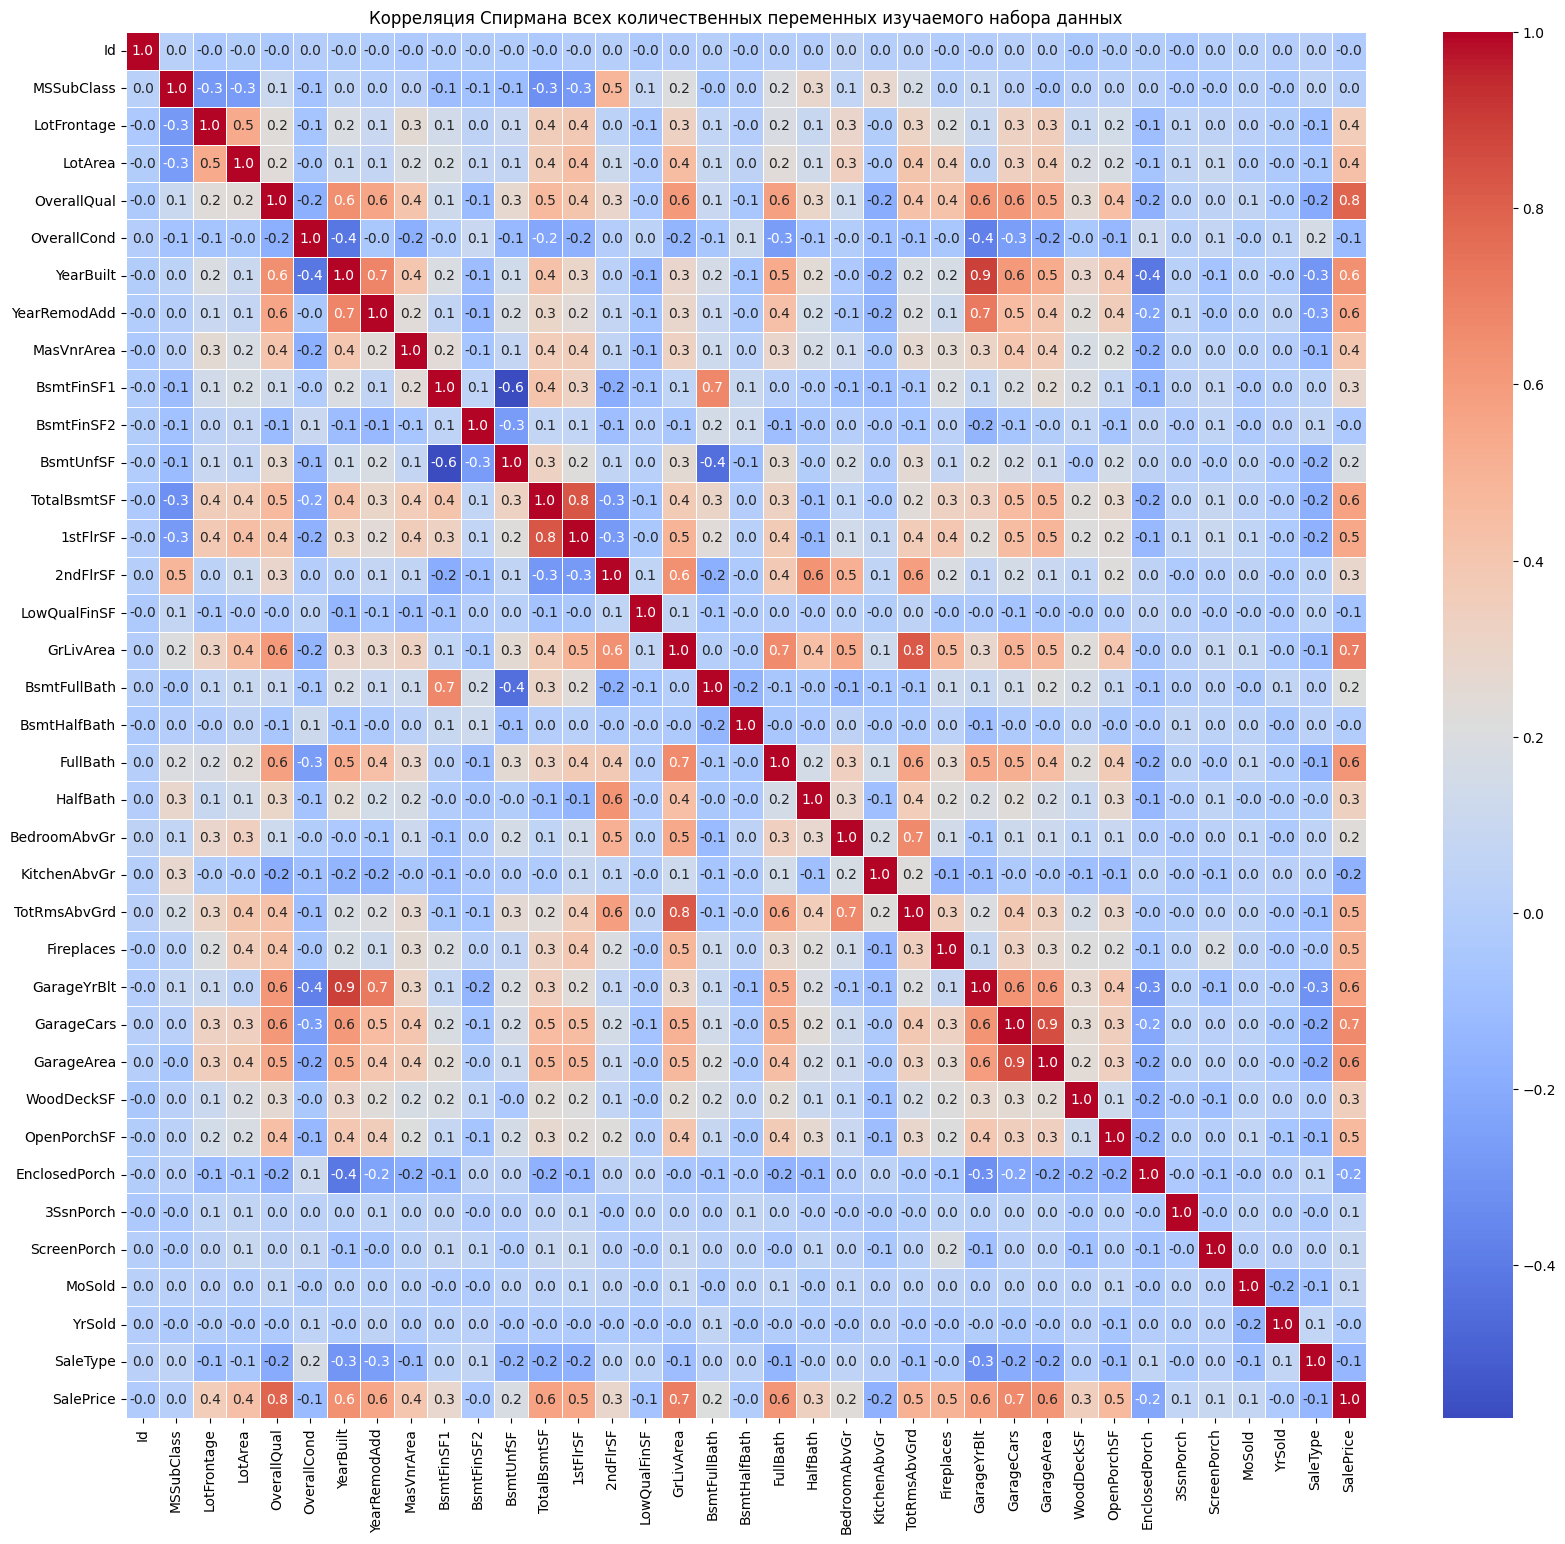

In [259]:
# Calculate Spearman correlation matrix
spearman_corr_matrix = quantitative_vars.corr(method='spearman')

# Plot Spearman correlation heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Корреляция Спирмана всех количественных переменных изучаемого набора данных')
plt.show()

#### Вывод: переменными с наибольшей корреляцией являются:
# 'OverallQual' (Общее качество материала и отделки),
# 'YearBuilt' (Первоначальная дата постройки),
# 'YearRemodAdd' (Дата ремонта),
# 'TotalBsmtSF' (Общая площадь подвала в квадратных метрах),
# '2ndFlrSF' (Площадь второго этажа, кв.),
# 'GrLivArea' (Жилая площадь над уровнем земли (земля), квадратные футы),
# 'FullBath' (Полноценные ванные комнаты над уровнем моря),
# 'GarageCars' (Размер гаража по вместимости автомобиля),
# 'SalePrice' (Цена продажи)

#### Вывод: переменными с наибольшей корреляцией являются:
# 'OverallQual' (Общее качество материала и отделки),  
# 'YearBuilt' (Первоначальная дата постройки),
# 'YearRemodAdd' (Дата ремонта),
# 'TotalBsmtSF' (Общая площадь подвала в квадратных метрах),
# '2ndFlrSF' (Площадь второго этажа, кв.),
# 'GrLivArea' (Жилая площадь над уровнем земли (земля), квадратные футы),
# 'FullBath' (Полноценные ванные комнаты над уровнем моря),
# 'GarageCars' (Размер гаража по вместимости автомобиля),
# 'SalePrice' (Цена продажи)

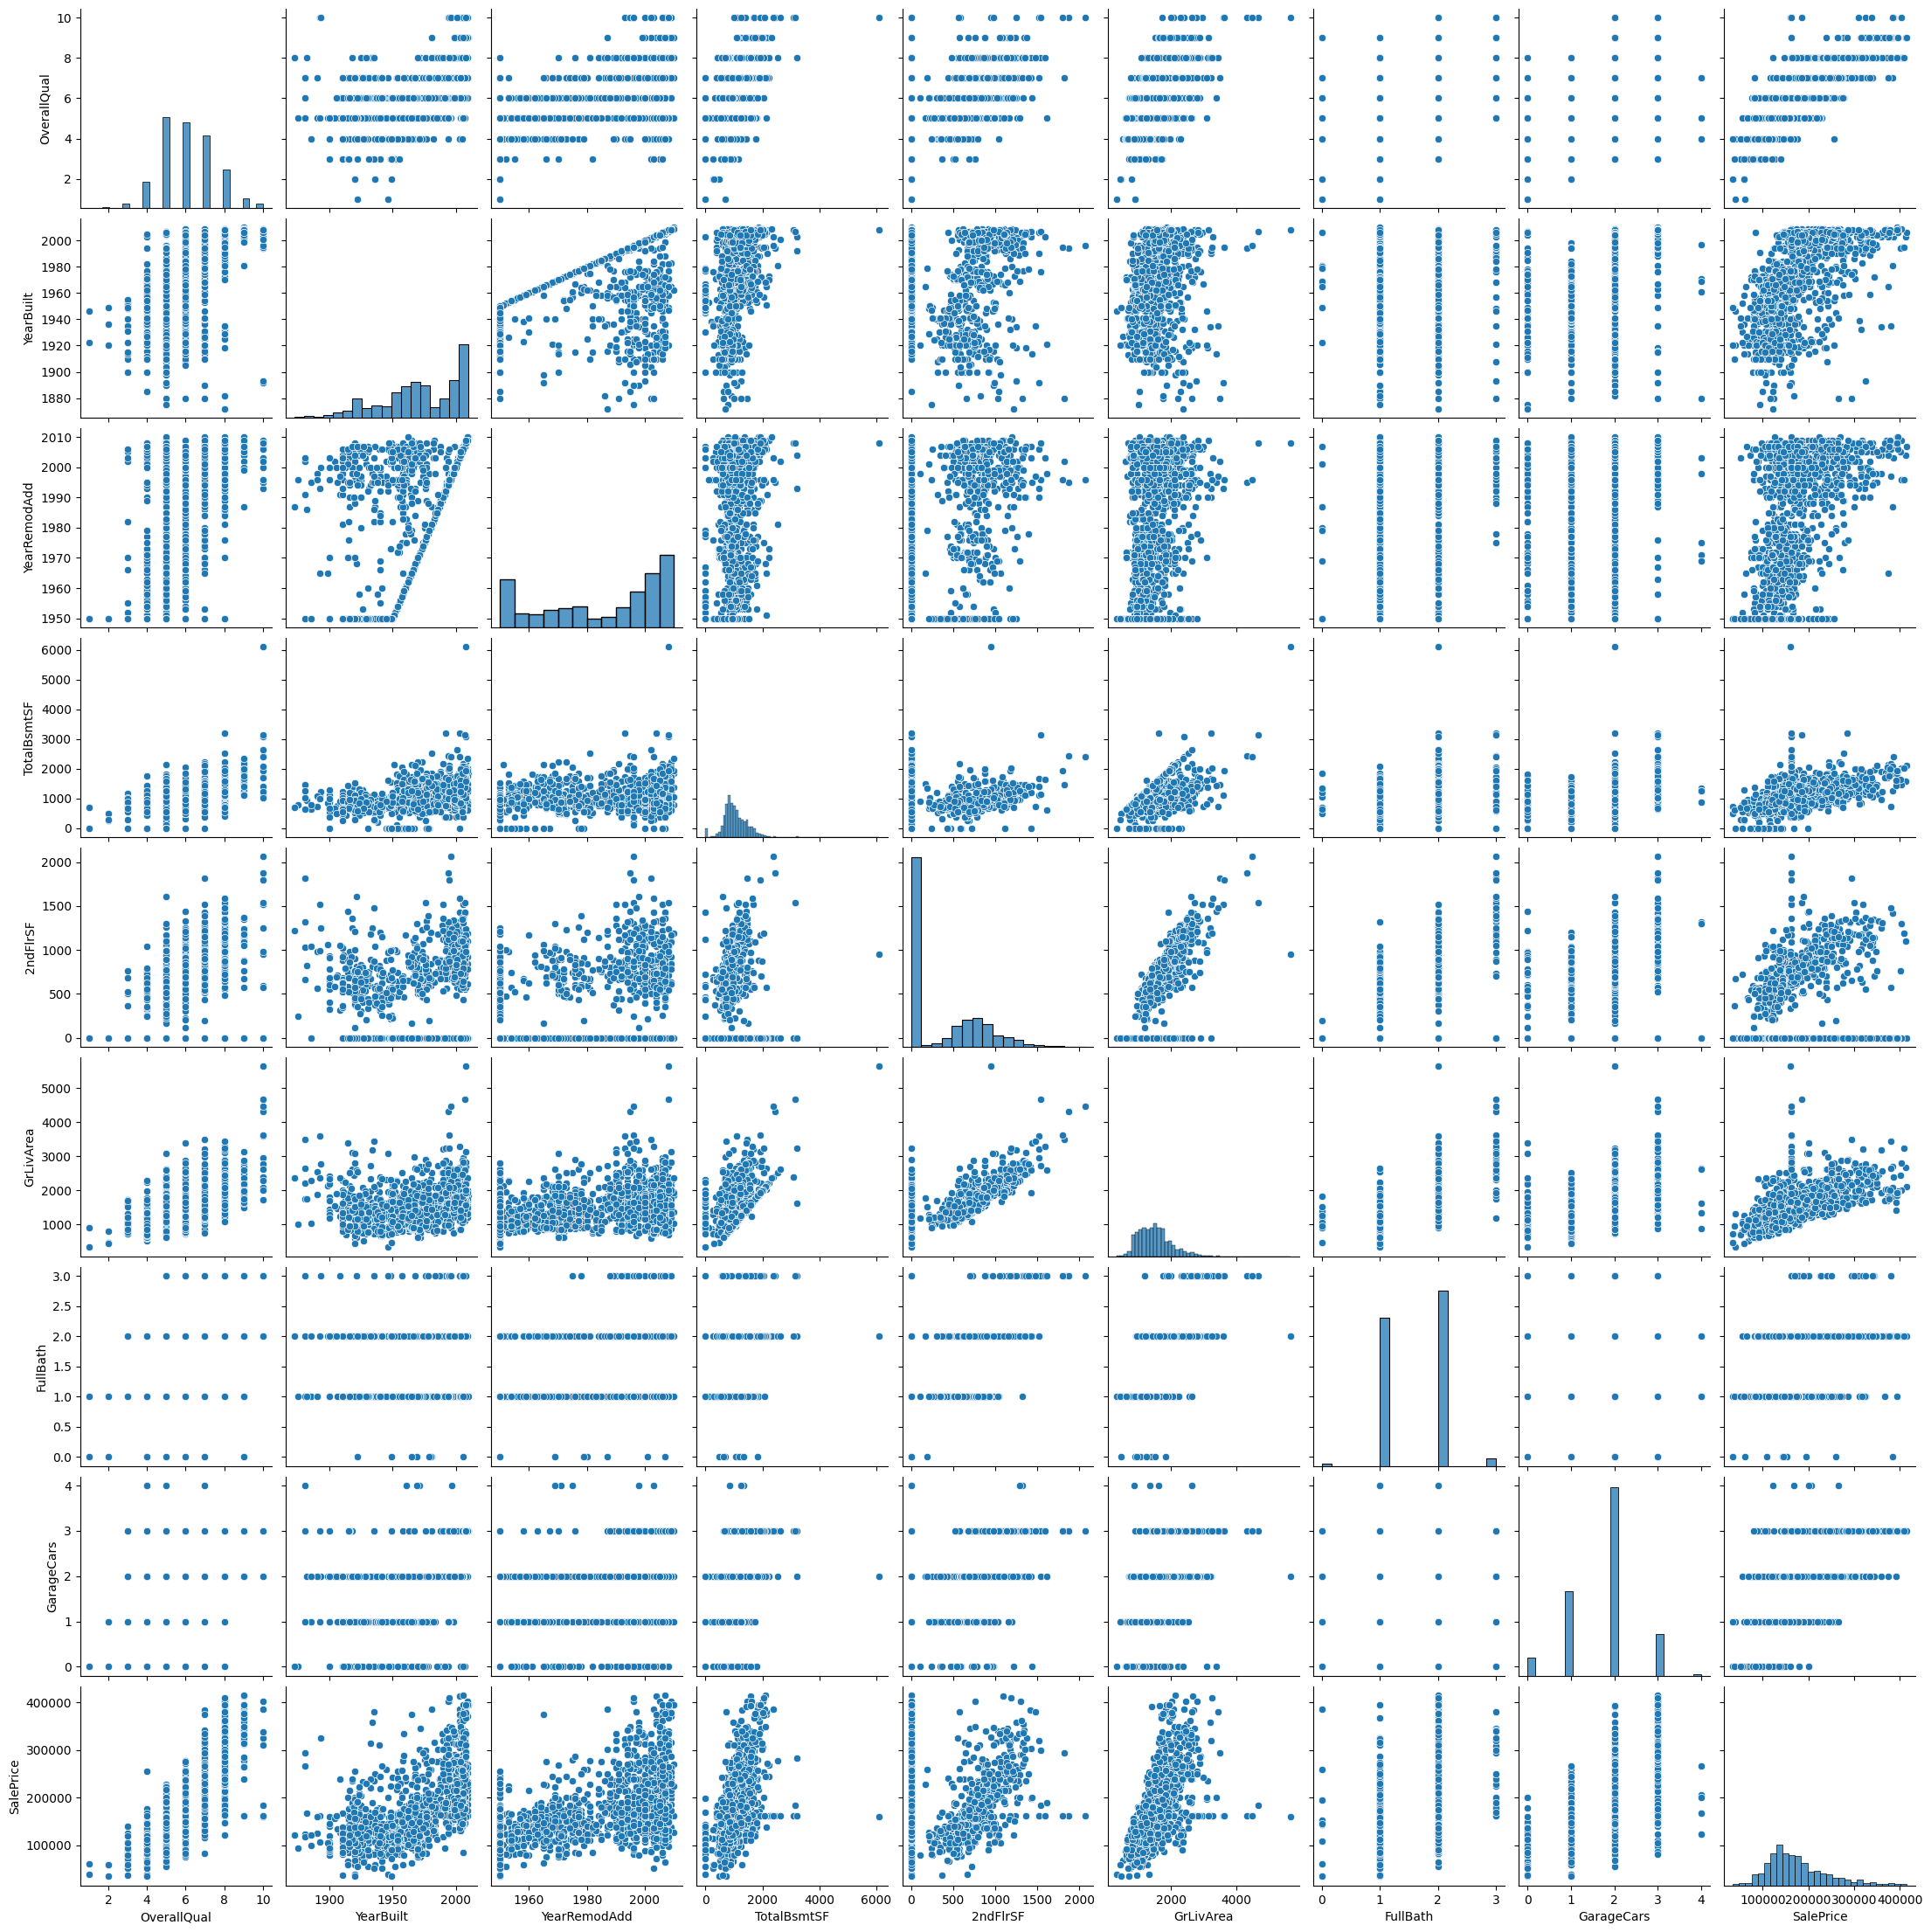

In [260]:
#### Отрисовка матрицы диаграмм рассеивания для наиболее значимых количественных переменных

selected_vars = ['OverallQual',  'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'SalePrice']

# Create a dataframe containing only the selected variables
selected_df = df[selected_vars]

# Use pairplot to create a matrix of scatter plots
sns.pairplot(selected_df)

#### Вывод: Три переменные: 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea' имеют вид взаимосвязи на цену продажи близкий к линейному

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     1460 non-null   int64  
 1   MSSubClass             1460 non-null   int64  
 2   MSZoning               1460 non-null   object 
 3   LotFrontage            1460 non-null   float64
 4   LotArea                1460 non-null   int64  
 5   LotShape               1460 non-null   object 
 6   LandContour            1460 non-null   object 
 7   LotConfig              1460 non-null   object 
 8   LandSlope              1460 non-null   object 
 9   Neighborhood           1460 non-null   object 
 10  Condition1             1460 non-null   object 
 11  Condition2             1460 non-null   object 
 12  BldgType               1460 non-null   object 
 13  HouseStyle             1460 non-null   object 
 14  OverallQual            1460 non-null   int64  
 15  Over

In [269]:
cols = ['SaleType', 'SalePrice', 'YrSold']

df['combined'] = df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [270]:
df['combined']




0       8_208500_2008
1       8_181500_2007
2       8_223500_2008
3       8_140000_2006
4       8_250000_2008
            ...      
1455    8_175000_2007
1456    8_210000_2010
1457    8_266500_2010
1458    8_142125_2010
1459    8_147500_2008
Name: combined, Length: 1460, dtype: object

In [272]:
df.to_csv('cleaned_house_prices.csv', index=False)